The followings code will allow you generate diferents perspectives of the quadruped  results for   artitrary values of angles ψ, θ, φ and a T traslation. 

 - In Section 1 are defined the imports and the dimensions of the quadruped: 

        L1: Correspond to the coxa's length.
        L2: Correspond to the femur's lenght.
        L3: Correspond to the tibia's lenght.


In [36]:
# Section 1:

import sys
import math
import numpy as np
import matplotlib.pyplot as plt

# Quadruped's dimensions:
L1, L2, L3 = 45, 78, 80
torso_lenght = 150
torso_width  = 90

- In the Sectiion 2 are defined the python's functions that solve the graphs of the positions of each of the elements of the robot:     
        
       graph_leg_side_view: get the graph of one leg from side view.
       graph_leg_front_or_back_view: get the graph of one leg from the front view or back view.
       rotation: perform an arbitrary rotation around an axe:'x', 'y' or 'z'.
       inverse_kinematics: get the inverse kinematics algorithm.

In [37]:
# Section 2:

def graph_leg_side_view(gamma, sys_r, 
                        L1=L1, 
                        L2=L2, 
                        L3=L3,
                        side='r',
                        linestyle='solid'):

    """ Get the graph of one leg of the quadruped from side view.

        Parameters :
           - gamma: (numpy array) joints' angles vector.
           - sys_r: (numpy array) position of the leg's begining.
           - L1: (float) Coxa's lenght.
           - L2: (float) femur's lenght.
           - L3: (float) tibia's lenght.
           - side: (string) the side of the quadruped.
           - linestyle: (string) type of the line.
    """
    gamma_1 = float(gamma[0][0])  
    gamma_2 = float(gamma[1][0])  
    gamma_3 = float(gamma[2][0])  

    s = 1 if side =='r' else -1

    x0, y0, _ = float(sys_r[0][0]), float(sys_r[1][0]), float(sys_r[2][0])
    rot_l1 = np.add(rotation('x', gamma_1, np.array([0, 0, s*L1]).reshape(3,1)), 
                                                                        sys_r)            
    # plot coxa
    plt.plot([x0, rot_l1[0][0]], [y0, rot_l1[1][0]], 
                                    color='r', 
                                    linestyle=linestyle, 
                                    linewidth=1.)
    
    rot_l2 = rotation('z', gamma_2, np.array([0,-L2, 0]).reshape(3,1))
    rot_l2 = np.add(rotation('x', gamma_1, rot_l2), rot_l1)
    # plor femur
    plt.plot([rot_l1[0][0], rot_l2[0][0]], [rot_l1[1][0], rot_l2[1][0]], 
                                    color='b', 
                                    linestyle=linestyle, 
                                    linewidth=1.)
    
    rot_l3 = rotation('z', gamma_2+gamma_3, np.array([0,-L3, 0]).reshape(3,1))
    rot_l3 = np.add(rotation('x', gamma_1, rot_l3), rot_l2)
    # plot tibia
    plt.plot([rot_l2[0][0], rot_l3[0][0]], [rot_l2[1][0], rot_l3[1][0]], 
                                    color='m', 
                                    linestyle=linestyle, 
                                    linewidth=1.)

def graph_leg_front_or_back_view(gamma, 
                         sys_r,
                         L1=L1, 
                         L2=L2, 
                         L3=L3, 
                         side='r',
                         front=True,
                         linestyle='solid'):
    
    """ Get the graph of one leg of the quadruped from the front view or
        back view.

        Parameters :
            - gamma: (numpy array) joints' angles vector.
            - sys_r: (numpy array) position of the leg's begining.
            - L1: (float) Coxa's lenght.
            - L2: (float) femur's lenght.
            - L3: (float) tibia's lenght.
            - side: (string) the side of the quadruped.
            - front: (bool) True is for the front, False for the back.
            - linestyle: (string) type of the line.
    """
    gamma_1 = float(gamma[0][0])  
    gamma_2 = float(gamma[1][0])  
    gamma_3 = float(gamma[2][0])  

    #side
    s = 1 if side =='r' else -1

    x0, y0, z0 = sys_r[0][0], sys_r[1][0], sys_r[2][0] 

    rot_l1 = np.add(rotation('x', gamma_1, np.array([0, 0, s*L1]).reshape(3,1)), 
                                                    sys_r)            

    if side == 'l' and front  : plt.axis([rot_l1[2][0], z0, 0.01, -0.01])
    if side == 'l' and ~front : plt.axis([rot_l1[2][0], z0, -0.01, 0.01])

    plt.plot([z0, rot_l1[2][0]], [y0, rot_l1[1][0]], 
                                    color='r', 
                                    linestyle=linestyle, 
                                    linewidth=1.)
    
    rot_l2 = np.add(rotation('x', gamma_1, 
                             np.array([0,-L2*np.cos(gamma_2), 0]).reshape(3,1)), 
                             rot_l1)

    plt.plot([rot_l1[2][0], rot_l2[2][0]], [rot_l1[1][0], rot_l2[1][0]], 
                                    color='b', 
                                    linestyle=linestyle, 
                                    linewidth=1.)
    
    rot_l3 = np.add(rotation('x', gamma_1, 
                              np.array([0,-L3*np.cos(gamma_2+gamma_3), 0]).reshape(3,1)), 
                              rot_l2)
    
    plt.plot([rot_l2[2][0], rot_l3[2][0]], [rot_l2[1][0], rot_l3[1][0]], 
                                    color='m', 
                                    linestyle=linestyle, 
                                    linewidth=1.)

def rotation(axe, angle, vector):

    """ Rotation around an axe:'x', 'y' or 'z' 
        Parameters:
            - axe (string): the axis around where you want to make the rotation.
            - angle (float): the angle in radian what you want to rotate.
            - vector (numpy vector (3,1)): the vector to rotate.
        Return:
         numpy array of shape (3,1) the rotated vector an angle arround the axe.
    """

    R = None 
    c = np.cos(angle)
    s = np.sin(angle)

    if axe == 'x':

        R = np.array([[1, 0,  0],
                      [0, c, -s],
                      [0, s,  c]]) 
    elif axe == 'y':

        R = np.array([[ c, 0, s],
                      [ 0, 1, 0],
                      [-s, 0, c ]])
    elif axe == 'z':

        R = np.array([[c, -s, 0],
                      [s,  c, 0],
                      [0,  0, 1]])
        
    
    return np.round(R @ vector, 4).reshape((3,1))


def inverse_kinematics(x, L_1, L_2, L_3, side='r'):

    """ Inverse kinematics algorithm. 
        Parameters:
            - X: (numpy array) position of the leg's tip.
            - L1: (float) Coxa's lenght.
            - L2: (float) femur's lenght.
            - L3: (float) tibia's lenght.
            - side: (string) the side of the quadruped.
        Returun:
            numpy vector of shape(3,1) with the angle of each joint.

    """

    s = 1.0  if side == 'r' else  -1.0

    x_1 = float(x[0][0])
    x_2 = float(x[1][0])
    x_3 = float(x[2][0])

    D = (x_1**2 + x_2**2 + x_3**2 - L_1**2 - L_2**2 - L_3**2) / (2*L_2*L_3)
    delta = np.sqrt(x_2**2 + x_3**2 - L_1**2)

    if 1 - D**2 >=0:

        theta_1 = np.arctan2(x_2, -x_3)  + np.arctan2(delta, -s*L_1) 

        theta_3 = np.arctan2(np.sqrt(1 - D**2), D)

        theta_2 = np.arctan2(x_1, delta) - np.arctan2(L_3*np.sin(theta_3), 
                                                      L_2 + L_3*np.cos(theta_3))
        
        return np.round(np.array([theta_1, theta_2, theta_3]),4).reshape(3,1)
    else:
        print('this position ', x, ' is not allowed')
        sys.exit(0)
        return None

- In section 3 is calculated the position of the quadruped after performs the rotation:



In [38]:
# Section 3
psi     = 0.2 
phi     = 0.0
theta   = 0.2

R_z = np.array([[np.cos(psi), -np.sin(psi), 0],
                [np.sin(psi),  np.cos(psi), 0],
                [0          ,  0,           1]])

R_y = np.array([[np.cos(phi),  0, np.sin(phi)],
                [0          ,  1,           0],
                [-np.sin(phi), 0, np.cos(phi)]])

R_x = np.array([[1,        0,                          0],
                [0,        np.cos(theta), -np.sin(theta)],
                [0,        np.sin(theta),  np.cos(theta)]])

distant_y = -80.0

rf_m_l = np.array([ torso_lenght / 2  , distant_y,  L1 + torso_width / 2]).reshape(3,1)  # right front tip of the foot measure from m
rr_m_l = np.array([-torso_lenght / 2  , distant_y,  L1 + torso_width / 2]).reshape(3,1)  # right front tip of the foot measure from m
lf_m_l = np.array([ torso_lenght / 2  , distant_y, -L1 - torso_width / 2]).reshape(3,1)  # right front tip of the foot measure from m
lr_m_l = np.array([-torso_lenght / 2  , distant_y, -L1 - torso_width / 2]).reshape(3,1)  # right front tip of the foot measure from m

T_y   = np.array([0.0, 0.0, 0.0]).reshape(3,1)
# 1 - Right Front Leg
rf_r_m_o     = np.array([torso_lenght / 2 , 0.0, torso_width / 2]).reshape(3,1)   
rf_r_m_o_rot = np.add(R_x @ R_y @ R_z @ rf_r_m_o, T_y)                            
rf_r_o_rot   = np.subtract(rf_m_l, rf_r_m_o_rot)                                  
# 2 - Right Rear Leg
rr_r_m_o     = np.array([-torso_lenght / 2 , 0.0, torso_width / 2]).reshape(3,1)  
rr_r_m_o_rot = np.add(R_x @ R_y @ R_z @ rr_r_m_o, T_y)                            
rr_r_o_rot   = np.subtract(rr_m_l, rr_r_m_o_rot)                                  
# 3 - Left Front Leg 
lf_r_m_o = np.array([torso_lenght / 2 , 0.0, -torso_width / 2]).reshape(3,1)      
lf_r_m_o_rot = np.add(R_x @ R_y @ R_z @ lf_r_m_o, T_y)                            
lf_r_o_rot = np.subtract(lf_m_l, lf_r_m_o_rot)                                    
# 4 - Left Rear Leg 
lr_r_m_o = np.array([-torso_lenght / 2 , 0.0, -torso_width / 2]).reshape(3,1)     
lr_r_m_o_rot = np.add(R_x @ R_y @ R_z @ lr_r_m_o, T_y)                            
lr_r_o_rot = np.subtract(lr_m_l, lr_r_m_o_rot)                                    

In [39]:
print('RF',str(inverse_kinematics(rf_r_o_rot, L1, L2, L3, side='r').reshape(1,3)).replace('  ',' ').replace('[','').replace(']', '').replace(' ', ' & '))
print('RR',str(inverse_kinematics(rr_r_o_rot, L1, L2, L3, side='r').reshape(1,3)).replace('  ',' ').replace('[','').replace(']', '').replace(' ', ' & '))
print('LF',str(inverse_kinematics(lf_r_o_rot, L1, L2, L3, side='l').reshape(1,3)).replace('  ',' ').replace('[','').replace(']', '').replace(' ', ' & '))
print('LR',str(inverse_kinematics(lr_r_o_rot, L1, L2, L3, side='l').reshape(1,3)).replace('  ',' ').replace('[','').replace(']', '').replace(' ', ' & '))

RF  & 0.0242 & -1.0081 & 2.0116
RR -0.0665 & -1.2404 & 2.3685
LF  & 0.0369 & -0.8415 & 1.6831
LR -0.028 & -1.1345 & 2.1796


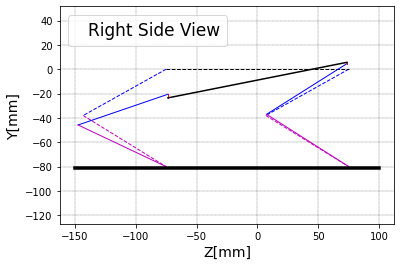

In [40]:
# Before Rotation
# Legs Draw:
# Front
graph_leg_side_view(inverse_kinematics(np.subtract(rf_m_l,rf_r_m_o), 
                                                        L1, L2, L3, 
                                                        side='r'), 
                                                        rf_r_m_o,
                                                        side = 'r',  
                                                        linestyle='dashed')
# Rear
graph_leg_side_view(inverse_kinematics(np.subtract(rr_m_l,rr_r_m_o), 
                                                        L1, L2, L3, 
                                                        side='r'), 
                                                        rr_r_m_o, 
                                                        side='r',
                                                        linestyle='dashed')
# Body Draw:
plt.plot([rr_r_m_o[0][0], rf_r_m_o[0][0]],
         [rr_r_m_o[1][0], rf_r_m_o[1][0]], 
         color='black', 
         linestyle='dashed', 
         linewidth=1.0)

# After Rotation:
# Legs Draw:
graph_leg_side_view(inverse_kinematics(rf_r_o_rot, L1, L2, L3, side='r'), 
                                                rf_r_m_o_rot, 
                                                side='r',
                                                linestyle='solid')
graph_leg_side_view(inverse_kinematics(rr_r_o_rot, L1, L2, L3, side='r'), 
                                                rr_r_m_o_rot,
                                                side ='r', 
                                                linestyle='solid')
# Body Draw:
plt.plot([rr_r_m_o_rot[0][0], rf_r_m_o_rot[0][0]],
         [rr_r_m_o_rot[1][0], rf_r_m_o_rot[1][0]],
         color='black', 
         linestyle='solid', 
         linewidth=1.5)
# Flor Draw:
plt.plot([-150, 100], [-81, -81], color='black', linewidth=3.5)

plt.grid(color='black', linestyle='dashed', linewidth=.25)
plt.legend(['Right Side View'],handlelength=0,loc=2, prop={'size': 17})
plt.xlabel('Z[mm]', size=14)
plt.ylabel('Y[mm]', size=14)
plt.axis('equal')
#plt.axis('off')
plt.show()

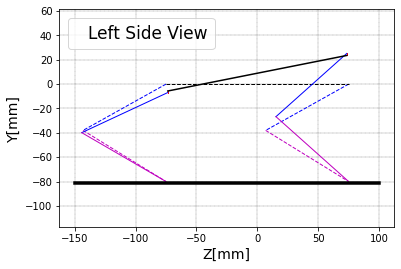

In [41]:
# Before Rotation
# Legs Draw:
graph_leg_side_view(inverse_kinematics(np.subtract(lf_m_l,lf_r_m_o), 
                                                        L1, L2, L3, 
                                                        side='l'), 
                                                        lf_r_m_o,
                                                        side='l',
                                                        linestyle='dashed')

graph_leg_side_view(inverse_kinematics(np.subtract(lr_m_l,lr_r_m_o), 
                                                        L1, L2, L3, 
                                                        side='l'), 
                                                        lr_r_m_o,
                                                        side='l', 
                                                        linestyle='dashed')
# Body Draw:
plt.plot([lr_r_m_o[0][0], lf_r_m_o[0][0]],
         [lr_r_m_o[1][0], lf_r_m_o[1][0]], 
         color='black', 
         linestyle='dashed', 
         linewidth=1.0)

# After Rotation:
# Legs Draw:
graph_leg_side_view(inverse_kinematics(lf_r_o_rot, L1, L2, L3, side='l'), 
                                                lf_r_m_o_rot,
                                                side='l' ,
                                                linestyle='solid')
graph_leg_side_view(inverse_kinematics(lr_r_o_rot, L1, L2, L3, side='l'), 
                                                lr_r_m_o_rot,
                                                side='l', 
                                                linestyle='solid')
# Body Draw:
plt.plot([lr_r_m_o_rot[0][0], lf_r_m_o_rot[0][0]],
         [lr_r_m_o_rot[1][0], lf_r_m_o_rot[1][0]],
         color='black', 
         linestyle='solid', 
         linewidth=1.5)
# Flor Draw:
plt.plot([-150, 100], [-81, -81], color='black', linewidth=3.5)

plt.grid(color='black', linestyle='dashed', linewidth=.25)
plt.legend(['Left Side View'],handlelength=0,loc=2, prop={'size': 17})
plt.xlabel('Z[mm]', size=14)
plt.ylabel('Y[mm]', size=14)
plt.axis('equal')
#plt.axis('off')
plt.show()

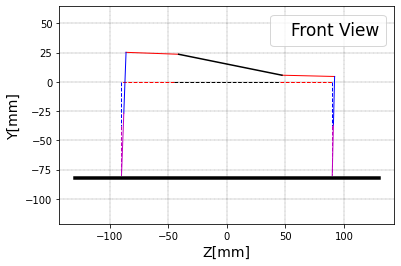

In [42]:
# Before rotation:
# Legs Draw:
graph_leg_front_or_back_view(inverse_kinematics(np.subtract(rf_m_l, rf_r_m_o), 
                                                      L1, L2, L3, side='r'), 
                                        rf_r_m_o,
                                        side ='r',
                                        front=True,
                                        linestyle='dashed')

graph_leg_front_or_back_view(inverse_kinematics(np.subtract(lf_m_l, lf_r_m_o), 
                                                       L1, L2, L3, side='l'), 
                                        lf_r_m_o,
                                        side='l',
                                        front=True,
                                        linestyle='dashed')

# Body Draw:
plt.plot([lf_r_m_o[2][0], rf_r_m_o[2][0]], 
         [lf_r_m_o[1][0], rf_r_m_o[1][0]], 
         color='black', linewidth=1.0, 
         linestyle='dashed')

# After rotation:
# Legs Draw:
graph_leg_front_or_back_view(inverse_kinematics(rf_r_o_rot, L1, L2, L3, 
                                                side='r'), 
                                rf_r_m_o_rot,
                                side='r',
                                front=True,
                                linestyle='solid')

graph_leg_front_or_back_view(inverse_kinematics(lf_r_o_rot, L1, L2, L3, 
                                                side='l'), 
                                lf_r_m_o_rot,
                                side='l',
                                front=True,
                                linestyle='solid')

# Body Draw:
plt.plot([lf_r_m_o_rot[2][0], rf_r_m_o_rot[2][0]],
         [lf_r_m_o_rot[1][0], rf_r_m_o_rot[1][0]]
         , color='k', linewidth=1.5)

plt.plot([-130, 130], [-82, -82], color='black', linewidth=3.5)

plt.grid(color='k', linestyle='dashed', linewidth=.25)
plt.legend(['Front View'],handlelength=0,loc=1, prop={'size': 17})
plt.xlabel('Z[mm]', size=14)
plt.ylabel('Y[mm]', size=14)
plt.axis('equal') 
#plt.axis('off')
plt.show()

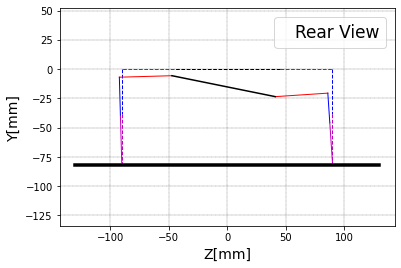

In [43]:
# Before rotation:
# Legs Draw:
graph_leg_front_or_back_view(inverse_kinematics(np.subtract(rr_m_l,rr_r_m_o), 
                                                       L1, L2, L3, side='r'), 
                                    rr_r_m_o, 
                                    side='r',
                                    front=False,                                            
                                    linestyle='dashed')

graph_leg_front_or_back_view(inverse_kinematics(np.subtract(lr_m_l,lr_r_m_o), 
                                                       L1, L2, L3, side='l'),  
                                    lr_r_m_o, 
                                    side='l',
                                    front=False,
                                    linestyle='dashed')
# Body Draw:
plt.plot([rr_r_m_o[2][0], lr_r_m_o[2][0]], 
         [rr_r_m_o[1][0], lr_r_m_o[1][0]], 
          color='black', linewidth=1.0, 
          linestyle='dashed')

# After rotation:
# Legs Draw:

graph_leg_front_or_back_view(inverse_kinematics(rr_r_o_rot, L1, L2, L3, 
                                                side='r'),             
                    rr_r_m_o_rot,
                    side='r',
                    front=False,
                    linestyle='solid')

graph_leg_front_or_back_view(inverse_kinematics(lr_r_o_rot, L1, L2, L3, 
                                                side='l'),  
                        lr_r_m_o_rot,
                        side='l',
                        front=False,
                        linestyle='solid')

# Body Draw:
plt.plot([rr_r_m_o_rot[2][0], lr_r_m_o_rot[2][0]],
         [rr_r_m_o_rot[1][0], lr_r_m_o_rot[1][0]],
         color='k', linewidth=1.5)

plt.plot([-130, 130], [-82, -82], color='black', linewidth=3.5)

plt.grid(color='k', linestyle='dashed', linewidth=.25)
plt.legend(['Rear View'],handlelength=0,loc=1, prop={'size': 17})
plt.xlabel('Z[mm]', size=14)
plt.ylabel('Y[mm]', size=14)
plt.axis('equal')
#plt.axis('off')
plt.show()

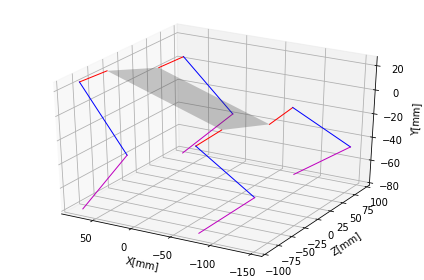

In [44]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')

RR_x, RF_x = rr_r_m_o_rot[0][0], rf_r_m_o_rot[0][0] 
RR_y, RF_y = rr_r_m_o_rot[1][0], rf_r_m_o_rot[1][0]
RR_z, RF_z = rr_r_m_o_rot[2][0], rf_r_m_o_rot[2][0]

LR_x, LF_x = lr_r_m_o_rot[0][0], lf_r_m_o_rot[0][0]
LR_y, LF_y = lr_r_m_o_rot[1][0], lf_r_m_o_rot[1][0]
LR_z, LF_z = lr_r_m_o_rot[2][0], lf_r_m_o_rot[2][0]

x = np.array([[RR_x, RF_x], [LR_x, LF_x]])
y = np.array([[RR_y, RF_y], [LR_y, LF_y]])
z = np.array([[RR_z, RF_z], [LR_z, LF_z]])

ax.plot_surface(x, z, y, color='gray',alpha=.3)

# RIGHT FRONT
gamma = inverse_kinematics(rf_r_o_rot, L1, L2, L3, side='r')
                                                
gamma_1 = float(gamma[0][0])  
gamma_2 = float(gamma[1][0])  
gamma_3 = float(gamma[2][0])  

x0, y0, z0 = float(RF_x), float(RF_y), float(RF_z)
rot_l1 = np.add(rotation('x', gamma_1, np.array([0, 0, L1]).reshape(3,1)), 
                                        rf_r_m_o_rot)            
# plot coxa
ax.plot([x0, rot_l1[0][0]], [z0, rot_l1[2][0]],[y0, rot_l1[1][0]], 
                                color='r', 
                                linewidth=1.)

rot_l2 = rotation('z', gamma_2, np.array([0,-L2, 0]).reshape(3,1))
rot_l2 = np.add(rotation('x', gamma_1, rot_l2), rot_l1)
# plot femur
ax.plot([rot_l1[0][0], rot_l2[0][0]], 
        [rot_l1[2][0], rot_l2[2][0]],
        [rot_l1[1][0], rot_l2[1][0]], 
        color='b', 
        linewidth=1.)

rot_l3 = rotation('z', gamma_2 + gamma_3, np.array([0,-L3, 0]).reshape(3,1))
rot_l3 = np.add(rotation('x', gamma_1, rot_l3), rot_l2)

# plot tibia
ax.plot([rot_l2[0][0], rot_l3[0][0]], 
        [rot_l2[2][0], rot_l3[2][0]], 
        [rot_l2[1][0], rot_l3[1][0]],
        color='m', 
        linewidth=1.)


#LEFT FRONT
gamma = inverse_kinematics(lf_r_o_rot, L1, L2, L3, side='l')
                                                
gamma_1 = float(gamma[0][0])  
gamma_2 = float(gamma[1][0])  
gamma_3 = float(gamma[2][0])  

x0, y0, z0 = float(LF_x), float(LF_y), float(LF_z)
rot_l1 = np.add(rotation('x', gamma_1, np.array([0, 0, -L1]).reshape(3,1)), lf_r_m_o_rot)            
# plot coxa
ax.plot([x0, rot_l1[0][0]], [z0, rot_l1[2][0]],[y0, rot_l1[1][0]], 
                                color='r', 
                                linewidth=1.)
rot_l2 = rotation('z', gamma_2, np.array([0,-L2, 0]).reshape(3,1))
rot_l2 = np.add(rotation('x', gamma_1, rot_l2), rot_l1)
# plor femur
ax.plot([rot_l1[0][0], rot_l2[0][0]], 
        [rot_l1[2][0], rot_l2[2][0]],
        [rot_l1[1][0], rot_l2[1][0]], 
        color='b', 
        linewidth=1.)

rot_l3 = rotation('z', gamma_2 + gamma_3, np.array([0,-L3, 0]).reshape(3,1))
rot_l3 = np.add(rotation('x', gamma_1, rot_l3), rot_l2)
# plot tibia
ax.plot([rot_l2[0][0], rot_l3[0][0]], 
        [rot_l2[2][0], rot_l3[2][0]], 
        [rot_l2[1][0], rot_l3[1][0]],
        color='m', 
        linewidth=1.)

# LEFT REAR
gamma = inverse_kinematics(lr_r_o_rot, L1, L2, L3, side='l')
                                                
gamma_1 = float(gamma[0][0])  
gamma_2 = float(gamma[1][0])  
gamma_3 = float(gamma[2][0])  

x0, y0, z0 = float(LR_x), float(LR_y), float(LR_z)
rot_l1 = np.add(rotation('x', gamma_1, np.array([0, 0, -L1]).reshape(3,1)), lr_r_m_o_rot)            
# plot coxa
ax.plot([x0, rot_l1[0][0]], [z0, rot_l1[2][0]],[y0, rot_l1[1][0]], 
                                color='r', 
                                linewidth=1.)
rot_l2 = rotation('z', gamma_2, np.array([0,-L2, 0]).reshape(3,1))
rot_l2 = np.add(rotation('x', gamma_1, rot_l2), rot_l1)
# plor femur
ax.plot([rot_l1[0][0], rot_l2[0][0]], 
        [rot_l1[2][0], rot_l2[2][0]],
        [rot_l1[1][0], rot_l2[1][0]], 
        color='b', 
        linewidth=1.)

rot_l3 = rotation('z', gamma_2 + gamma_3, np.array([0,-L3, 0]).reshape(3,1))
rot_l3 = np.add(rotation('x', gamma_1, rot_l3), rot_l2)
# plot tibia

ax.plot([rot_l2[0][0], rot_l3[0][0]], 
        [rot_l2[2][0], rot_l3[2][0]], 
        [rot_l2[1][0], rot_l3[1][0]],
         color='m', 
         linewidth=1.)

# RIGHT REAR
gamma = inverse_kinematics(rr_r_o_rot, L1, L2, L3, side='r')
                                          
gamma_1 = float(gamma[0][0])  
gamma_2 = float(gamma[1][0])  
gamma_3 = float(gamma[2][0])  

x0, y0, z0 = float(RR_x), float(RR_y), float(RR_z)

rot_l1 = np.add(rotation('x', gamma_1, np.array([0, 0, L1]).reshape(3,1)), 
                rr_r_m_o_rot).reshape(3,1)            
# plot coxa
ax.plot([x0, rot_l1[0][0]], 
        [z0, rot_l1[2][0]], 
        [y0, rot_l1[1][0]], 
        color='r', 
        linewidth=1.)

rot_l2 = rotation('z', gamma_2, np.array([0,-L2, 0]).reshape(3,1))
rot_l2 = np.add(rotation('x', gamma_1, rot_l2), rot_l1)
# plor femur
ax.plot([rot_l1[0][0], rot_l2[0][0]], 
        [rot_l1[2][0], rot_l2[2][0]],
        [rot_l1[1][0], rot_l2[1][0]], 
        color='b', 
        linewidth=1.)

rot_l3 = rotation('z', gamma_2+gamma_3, np.array([0,-L3, 0]).reshape(3,1))
rot_l3 = np.add(rotation('x', gamma_1, rot_l3), rot_l2)
# plot tibia
ax.plot([rot_l2[0][0], rot_l3[0][0]], 
        [rot_l2[2][0], rot_l3[2][0]], 
        [rot_l2[1][0], rot_l3[1][0]],
        color='m', 
        linewidth=1.)

ax.invert_yaxis()
#ax.invert_xaxis()
#ax.legend(['3D quadruped view'], handlelength=0, loc=4, prop={'size': 10})
ax.set(xlabel='X[mm]', ylabel='Z[mm]', zlabel='Y[mm]')
fig.tight_layout()

[-601.60542705 1425.        ]


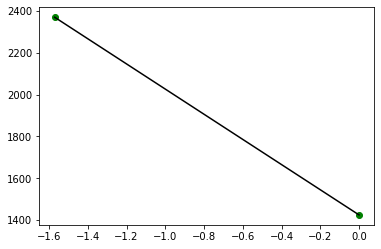

In [45]:
import numpy as np
import matplotlib.pyplot as plt
# LR_servo_i data:
DEG_TO_RAD  = 0.0174533
x_grad = [0,-90]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1425,2370]
coef_servo_i = np.polyfit(x,y,1)
print(coef_servo_i)
poly1d_fn = np.poly1d(coef_servo_i) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[-604.78852455 1050.        ]


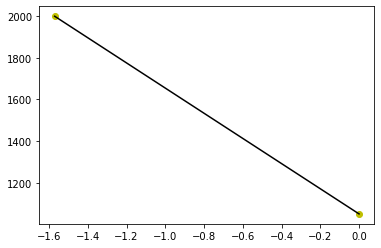

In [ ]:
# LR_servo_ii data:
DEG_TO_RAD  = 0.0174533

x_grad = [0,-90]

x = [e*DEG_TO_RAD for e in x_grad]


y = [1050, 2000]

coef_servo_ii = np.polyfit(x,y,1)
print(coef_servo_ii)
poly1d_fn = np.poly1d(coef_servo_ii) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'yo', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker


[ 957.22527156 -114.77667663]


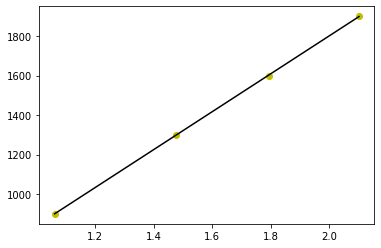

In [ ]:
# LR_servo_iii data:
DEG_TO_RAD  = 0.0174533

y = [900,1300,1600,1900]

x_grad = [60.78,84.5,102.88,120.5]

bias = 0.0 
x = [(e+bias)*DEG_TO_RAD for e in x_grad]

coef_servo_iii = np.polyfit(x,y,1)
print(coef_servo_iii)
poly1d_fn = np.poly1d(coef_servo_iii) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'yo', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker


In [ ]:
x = np.array([0,-100, -L1]).reshape(3,1)
res = inverse_kinematics(x, L1, L2, L3, side='l')

In [ ]:
int(round(coef_servo_i[0] * (res[0][0]) + coef_servo_i[1],0))

1425

In [ ]:
int(round(coef_servo_ii[0] * (res[1][0]) + coef_servo_ii[1],0))

1571

In [ ]:
int(round(coef_servo_iii[0] * (res[2][0]) + coef_servo_iii[1],0))

1550

[ 584.09839082 1465.        ]


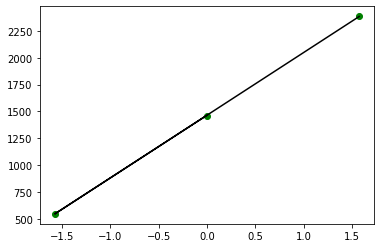

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# LF_servo_i data:
DEG_TO_RAD  = 0.0174533
x_grad = [0,-90, 90]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1460,550,2385]
coef_servo_i = np.polyfit(x,y,1)
print(coef_servo_i)
poly1d_fn = np.poly1d(coef_servo_i) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[-627.07020704  970.        ]


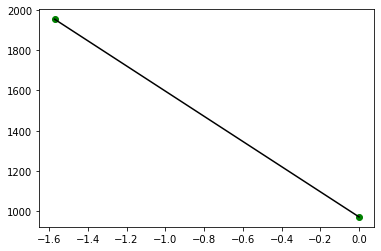

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# LF_servo_ii data:
DEG_TO_RAD  = 0.0174533
x_grad = [-90,0]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1955,970]

coef_servo_ii = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_ii) 
print(coef_servo_ii)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[949.2240125  -25.43047706]


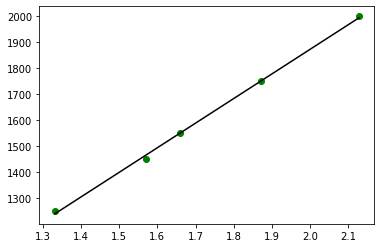

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# LF_servo_iii data:
DEG_TO_RAD  = 0.0174533
x_grad = [74.44, 88.15, 93.25, 105.42, 120.05]

bias = 90 - 88.15
x = [(e+bias)*DEG_TO_RAD for e in x_grad]

y = [1250, 1450, 1550, 1750, 2000]

coef_servo_iii = np.polyfit(x,y,1)
print(coef_servo_iii)
poly1d_fn = np.poly1d(coef_servo_iii) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

In [ ]:
x = np.array([0,-70,0-L1]).reshape(3,1)
res = inverse_kinematics(x, L1, L2, L3, side='l')

In [ ]:
int(round(coef_servo_i[0] * (res[0][0]) + coef_servo_i[1],0))

1465

In [ ]:
int(round(coef_servo_ii[0] * (res[1][0]) + coef_servo_ii[1],0))

1653

In [ ]:
int(round(coef_servo_iii[0] * (res[2][0]) + coef_servo_iii[1],0))

2067

[-601.60542705 1473.33333333]


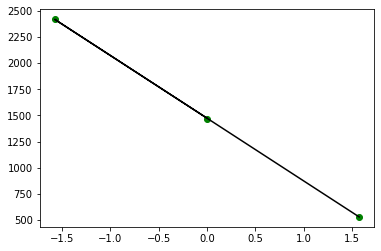

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RR_servo_i data:
DEG_TO_RAD  = 0.0174533
x_grad = [0,-90,90]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1490-20,2440-20,550-20]
coef_servo_i = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_i) 
print(coef_servo_i) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[ 636.61949953 2020.        ]


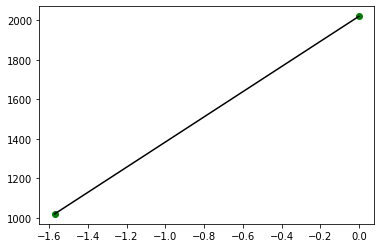

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RR_servo_ii data:
DEG_TO_RAD  = 0.0174533
x_grad = [-90,0]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1020,2020]
coef_servo_ii = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_ii)
print(coef_servo_ii) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[-1053.44201921  3297.69769341]


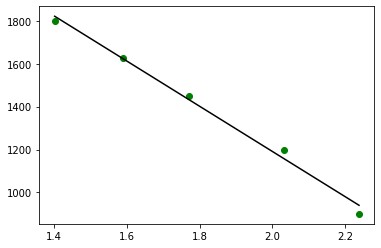

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RR_servo_iii data:
DEG_TO_RAD  = 0.0174533
x_grad = [128.22, 116.4, 101.5, 91, 80.31]

bias = 0.0
x = [(e+bias)*DEG_TO_RAD for e in x_grad]

y = [900, 1200, 1450 ,1625, 1800]
coef_servo_iii = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_iii) 
print(coef_servo_iii)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

In [ ]:
x = np.array([0,-100,L1]).reshape(3,1)
res = inverse_kinematics(x, L1, L2, L3, side='r')

In [ ]:
int(round(coef_servo_i[0] * (res[0][0]) + coef_servo_i[1],0))

1473

In [ ]:
int(round(coef_servo_ii[0] * (res[1][0]) + coef_servo_ii[1],0))

1471

In [ ]:
int(round(coef_servo_iii[0] * (res[2][0]) + coef_servo_iii[1],0))

1466

[ 598.42232956 1500.        ]


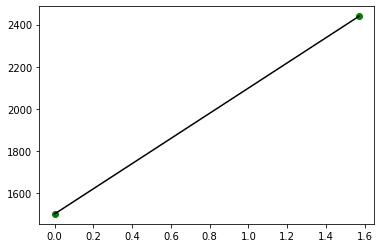

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RF_servo_i data:
DEG_TO_RAD  = 0.0174533
x_grad = [0,90]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1500,2440]
coef_servo_i = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_i) 
print(coef_servo_i)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[ 601.60542705 1985.        ]


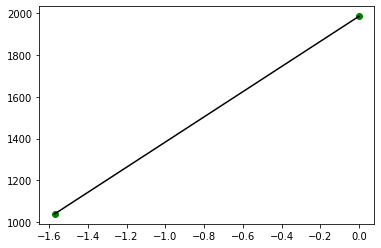

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RF_servo_ii data:
DEG_TO_RAD  = 0.0174533
x_grad = [-90,0]

x = [e*DEG_TO_RAD for e in x_grad]

y = [1040,1985]
coef_servo_ii = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_ii) 
print(coef_servo_ii)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

[-990.64488319 3088.20381872]


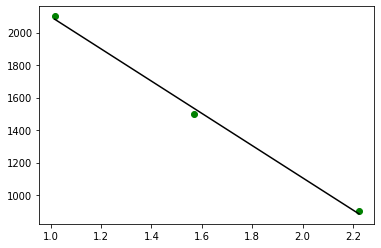

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RF_servo_iii data:
DEG_TO_RAD  = 0.0174533
x_grad = [127.45, 89.91, 58.21 ]

bias = 0
x = [(e+bias)*DEG_TO_RAD for e in x_grad]

y = [900,1500,2100] 
coef_servo_iii = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef_servo_iii) 
print(coef_servo_iii)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x,y, 'go', x, poly1d_fn(x), 'k') #'--k'=black dashed line, 'yo' = yellow circle marker

In [ ]:
x = np.array([0,-70,L1]).reshape(3,1)
res = inverse_kinematics(x, L1, L2, L3, side='r')

In [ ]:
int(round(coef_servo_i[0] * (res[0][0]) + coef_servo_i[1],0))

1500

In [ ]:
int(round(coef_servo_ii[0] * (res[1][0]) + coef_servo_ii[1],0))

1330

In [ ]:
int(round(coef_servo_iii[0] * (res[2][0]) + coef_servo_iii[1],0))

904

In [ ]:
1876.54/np.sqrt(1 - 0.36**2)

2011.399718520772

In [ ]:
1876.54 + 134.98

2011.52

In [ ]:
0.046714965 + 0.0008

0.047514965

In [ ]:
0.0008 * 6132

4.905600000000001

In [ ]:
3000 + 2576.530612244898 + 510.2040816326531

6086.734693877552

In [ ]:
((6900 * 200 - 335 * 3 * 1000 - 100*1000) / 200 ) - 450

925.0

In [ ]:
tc = 195
presupuesto = 7000
johnny = 500
# Placas 3070 ti
placas = (310 * 3 * 1000) / tc
componentes = (17850 + 19017 + 41880 + 3*1599 + 1199) / tc
print('placas:              ', placas)
print('componentes:         ', componentes)
print('componentes + placas:',  componentes + placas)
print('Profit:              ', (presupuesto) - (componentes + placas + johnny))
print('Profit: %:           ', 100*((presupuesto) - (componentes + placas + johnny) ) / (componentes + placas))

placas:               4769.2307692307695
componentes:          434.57948717948716
componentes + placas: 5203.810256410256
Profit:               1296.1897435897436
Profit: %:            24.908474362474045


In [ ]:
total = placas + componentes + 3000
totta

NameError: ignored

In [ ]:
(310*3 - 186 - 239)*1000 / 195

In [ ]:
6900 - total - 450

In [ ]:
6900 - 450 

In [ ]:
40 + 6 + 15 + 3 + 3 + 5